In [1]:
import numpy as np
from scipy.io import wavfile
import matplotlib.pyplot as plt

In [2]:
samplerate = 44100
dt = 1 / samplerate
t = np.arange(start=0, stop=1.5, step=dt)
n = len(t)

In [3]:
signal = 2 * np.sin(110 * 2 * np.pi * t) + np.sin(50 * 2 * np.pi * t)
original_signal = signal.copy()

signal = signal + 2 * (2 * np.random.rand(n) - 1)

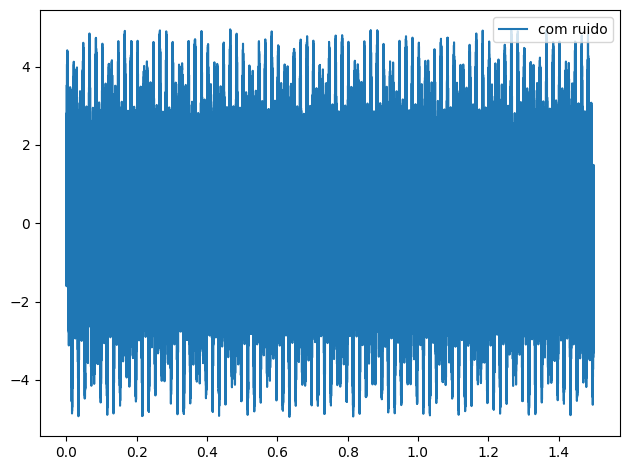

In [4]:
plt.plot(t, signal, label='com ruido')
# plt.plot(t, original_signal, label='sem ruido')
plt.legend()
plt.tight_layout()
plt.show()

In [5]:
signal_hat = np.fft.fft(signal)
freq_signal = np.fft.fftfreq(n, d=dt)
signal_hat_abs = 2 * np.abs(signal_hat) / n

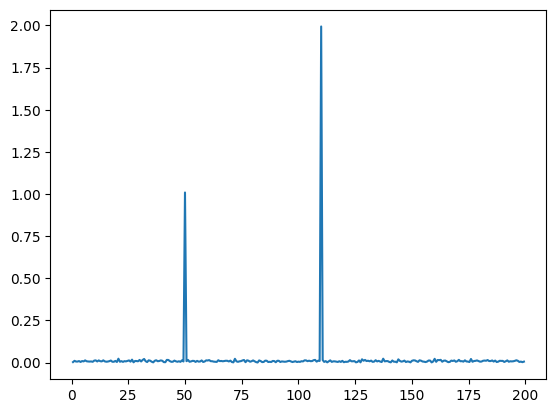

In [6]:
L = np.logical_and(freq_signal > 0, freq_signal < 200)
plt.plot(freq_signal[L], signal_hat_abs[L])
plt.show()

In [7]:
signal_clean_hat = signal_hat.copy()
signal_clean_hat[signal_hat_abs < 0.2] = 0
signal_clean = np.fft.ifft(signal_clean_hat)

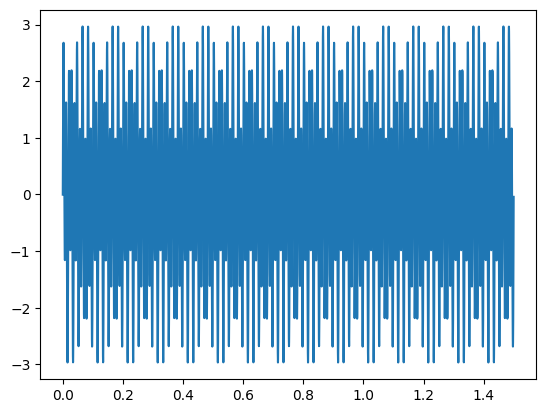

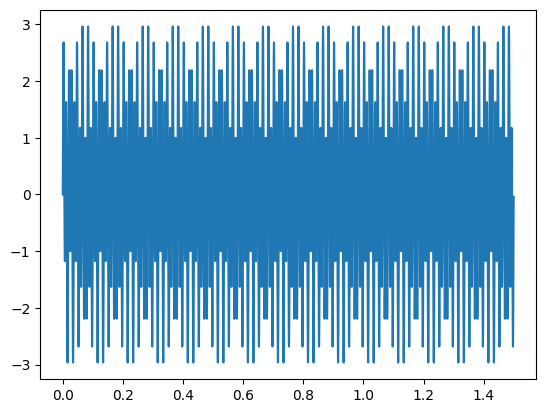

In [9]:
plt.plot(t, signal_clean)
plt.show()
plt.plot(t, original_signal)
plt.show()